In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_json("results/aggregated_mutations_with_diff.json")

In [2]:
df.head()

,program_name,program_source_before,diff,program_source_after,operator_name,job_id,execution_result,mutation_object,result_object
0,hist,from tracr.rasp import rasp\n\n\ndef make_hist...,"{'diff_type': 'WEIGHT_DIFF', 'equal': ['pos_em...",from tracr.rasp import rasp\n\n\ndef make_hist...,operators/replace-rasp-comparison,4877157928854d51aa44ea18a425e1cb,"{'status': 'BUGGY_MODEL', 'accuracy': 0.0}","{'job_id': '4877157928854d51aa44ea18a425e1cb',...","{'worker_outcome': 'normal', 'output': '======..."
1,hist,from tracr.rasp import rasp\n\n\ndef make_hist...,"{'diff_type': 'WEIGHT_DIFF', 'equal': ['pos_em...",from tracr.rasp import rasp\n\n\ndef make_hist...,operators/replace-rasp-comparison,0821180454774c03943382a0c5059621,"{'status': 'BUGGY_MODEL', 'accuracy': 0.0}","{'job_id': '0821180454774c03943382a0c5059621',...","{'worker_outcome': 'normal', 'output': '======..."
2,hist,from tracr.rasp import rasp\n\n\ndef make_hist...,"{'diff_type': 'WEIGHT_DIFF', 'equal': ['pos_em...",from tracr.rasp import rasp\n\n\ndef make_hist...,operators/replace-rasp-comparison,7018bc1b6b5946ff93b3061929ff42fb,"{'status': 'BUGGY_MODEL', 'accuracy': 0.044}","{'job_id': '7018bc1b6b5946ff93b3061929ff42fb',...","{'worker_outcome': 'normal', 'output': '======..."
3,hist,from tracr.rasp import rasp\n\n\ndef make_hist...,"{'diff_type': 'WEIGHT_DIFF', 'equal': ['pos_em...",from tracr.rasp import rasp\n\n\ndef make_hist...,operators/replace-rasp-comparison,f6202828c934440cb94e243988c4ce17,"{'status': 'BUGGY_MODEL', 'accuracy': 0.0}","{'job_id': 'f6202828c934440cb94e243988c4ce17',...","{'worker_outcome': 'normal', 'output': '======..."
4,hist,from tracr.rasp import rasp\n\n\ndef make_hist...,"{'diff_type': 'WEIGHT_DIFF', 'equal': ['pos_em...",from tracr.rasp import rasp\n\n\ndef make_hist...,operators/replace-rasp-comparison,995b557c92874d1bac6b62a98500ae9d,"{'status': 'BUGGY_MODEL', 'accuracy': 0.032}","{'job_id': '995b557c92874d1bac6b62a98500ae9d',...","{'worker_outcome': 'normal', 'output': '======..."


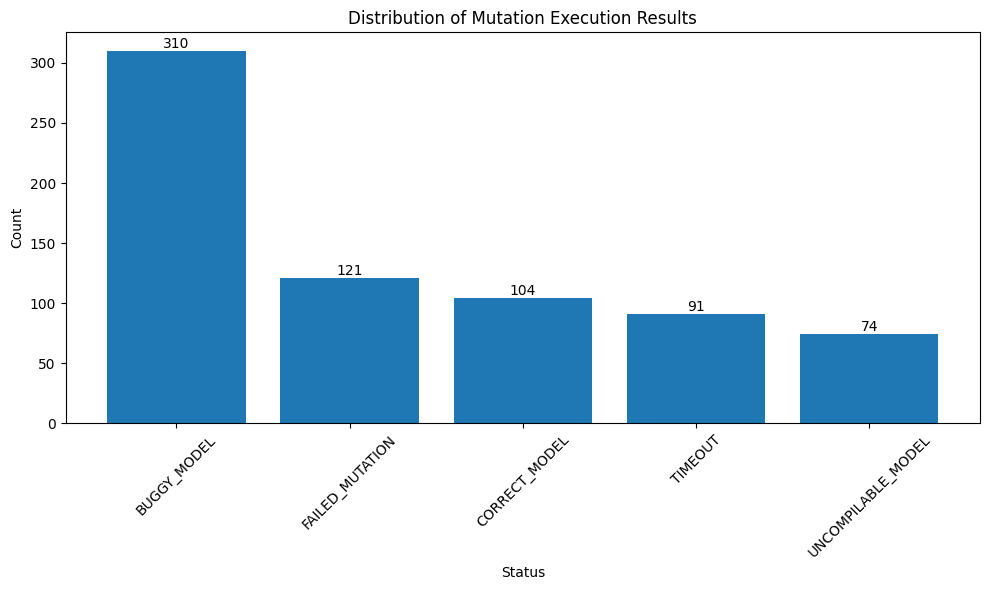

In [3]:
# Create a bar plot of execution results
# Count the different status types
status_counts = df["execution_result"].apply(lambda x: x["status"]).value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values)

# Customize the plot
plt.title("Distribution of Mutation Execution Results")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(status_counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

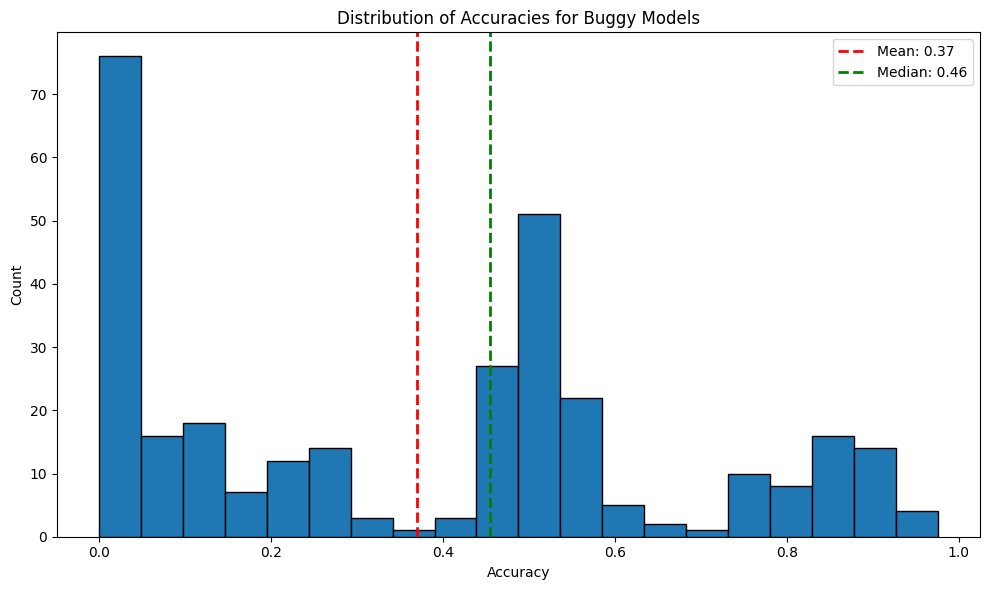

Number of buggy models: 310
Mean accuracy: 0.37
Median accuracy: 0.46
Min accuracy: 0.00
Max accuracy: 0.98


In [4]:
# Filter for only BUGGY_MODEL results and extract accuracies
buggy_models = df[df["execution_result"].apply(lambda x: x["status"] == "BUGGY_MODEL")]
accuracies = buggy_models["execution_result"].apply(lambda x: x["accuracy"])

# Create histogram of accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=20, edgecolor="black")

# Customize the plot
plt.title("Distribution of Accuracies for Buggy Models")
plt.xlabel("Accuracy")
plt.ylabel("Count")

# Add summary statistics
plt.axvline(
    accuracies.mean(),
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean: {accuracies.mean():.2f}",
)
plt.axvline(
    accuracies.median(),
    color="green",
    linestyle="dashed",
    linewidth=2,
    label=f"Median: {accuracies.median():.2f}",
)

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Number of buggy models: {len(accuracies)}")
print(f"Mean accuracy: {accuracies.mean():.2f}")
print(f"Median accuracy: {accuracies.median():.2f}")
print(f"Min accuracy: {accuracies.min():.2f}")
print(f"Max accuracy: {accuracies.max():.2f}")

In [5]:
# Create a summary table by program showing execution results and diff types
summary = []
for program in df["program_name"].unique():
    program_data = df[df["program_name"] == program]
    total = len(program_data)

    # Count different status types 
    status_counts = program_data["execution_result"].apply(lambda x: x["status"]).value_counts()

    # Calculate mean accuracy for buggy models
    buggy_models = program_data[program_data["execution_result"].apply(lambda x: x["status"] == "BUGGY_MODEL")]
    mean_accuracy = buggy_models["execution_result"].apply(lambda x: x["accuracy"]).mean()

    # Count diff types for buggy models
    arch_diffs = np.sum([d['diff_type'] == 'ARCH_DIFF' for d in buggy_models['diff']])
    weight_diffs = np.sum([d['diff_type'] == 'WEIGHT_DIFF' for d in buggy_models['diff']])
    total_diffs = arch_diffs + weight_diffs

    summary.append({
        "Program": program,
        "Total Mutations": total,
        "Failed Mutations": f"{status_counts.get('FAILED_MUTATION', 0)} ({status_counts.get('FAILED_MUTATION', 0)/total*100:.1f}%)",
        "Uncompilable": f"{status_counts.get('UNCOMPILABLE_MODEL', 0)} ({status_counts.get('UNCOMPILABLE_MODEL', 0)/total*100:.1f}%)", 
        "Correct Models": f"{status_counts.get('CORRECT_MODEL', 0)} ({status_counts.get('CORRECT_MODEL', 0)/total*100:.1f}%)",
        "Buggy Models": f"{status_counts.get('BUGGY_MODEL', 0)} ({status_counts.get('BUGGY_MODEL', 0)/total*100:.1f}%)",
        "Timeouts": f"{status_counts.get('TIMEOUT', 0)} ({status_counts.get('TIMEOUT', 0)/total*100:.1f}%)",
        "ARCH_DIFF": f"{arch_diffs} ({arch_diffs/total_diffs*100:.1f}% of diffs)" if total_diffs > 0 else "0 (0%)",
        "WEIGHT_DIFF": f"{weight_diffs} ({weight_diffs/total_diffs*100:.1f}% of diffs)" if total_diffs > 0 else "0 (0%)",
        "Mean Accuracy (Buggy)": f"{mean_accuracy:.2f}" if not pd.isna(mean_accuracy) else "N/A",
    })

# Create and display DataFrame
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values("Total Mutations", ascending=False)

# Calculate totals
total_mutations = df.shape[0]
total_status_counts = df["execution_result"].apply(lambda x: x["status"]).value_counts()
total_buggy = df[df["execution_result"].apply(lambda x: x["status"] == "BUGGY_MODEL")]
total_mean_accuracy = total_buggy["execution_result"].apply(lambda x: x["accuracy"]).mean()

# Count total diff types
total_arch_diffs = np.sum([d['diff_type'] == 'ARCH_DIFF' for d in total_buggy['diff']])
total_weight_diffs = np.sum([d['diff_type'] == 'WEIGHT_DIFF' for d in total_buggy['diff']])
total_diffs = total_arch_diffs + total_weight_diffs

# Add total row
total_row = pd.DataFrame([{
    "Program": "TOTAL",
    "Total Mutations": total_mutations,
    "Failed Mutations": f"{total_status_counts.get('FAILED_MUTATION', 0)} ({total_status_counts.get('FAILED_MUTATION', 0)/total_mutations*100:.1f}%)",
    "Uncompilable": f"{total_status_counts.get('UNCOMPILABLE_MODEL', 0)} ({total_status_counts.get('UNCOMPILABLE_MODEL', 0)/total_mutations*100:.1f}%)",
    "Correct Models": f"{total_status_counts.get('CORRECT_MODEL', 0)} ({total_status_counts.get('CORRECT_MODEL', 0)/total_mutations*100:.1f}%)", 
    "Buggy Models": f"{total_status_counts.get('BUGGY_MODEL', 0)} ({total_status_counts.get('BUGGY_MODEL', 0)/total_mutations*100:.1f}%)",
    "Timeouts": f"{total_status_counts.get('TIMEOUT', 0)} ({total_status_counts.get('TIMEOUT', 0)/total_mutations*100:.1f}%)",
    "ARCH_DIFF": f"{total_arch_diffs} ({total_arch_diffs/total_diffs*100:.1f}% of diffs)" if total_diffs > 0 else "0 (0%)",
    "WEIGHT_DIFF": f"{total_weight_diffs} ({total_weight_diffs/total_diffs*100:.1f}% of diffs)" if total_diffs > 0 else "0 (0%)",
    "Mean Accuracy (Buggy)": f"{total_mean_accuracy:.2f}" if not pd.isna(total_mean_accuracy) else "N/A",
}])

# Combine summary and total
summary_df = pd.concat([summary_df, total_row])

# Display the table with better formatting
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
display(summary_df)


,Program,Total Mutations,Failed Mutations,Uncompilable,Correct Models,Buggy Models,Timeouts,ARCH_DIFF,WEIGHT_DIFF,Mean Accuracy (Buggy)
4,shuffle_dyck2,229,44 (19.2%),25 (10.9%),18 (7.9%),82 (35.8%),60 (26.2%),4 (4.9% of diffs),78 (95.1% of diffs),0.63
3,shuffle_dyck,228,38 (16.7%),21 (9.2%),72 (31.6%),86 (37.7%),11 (4.8%),3 (3.5% of diffs),83 (96.5% of diffs),0.57
1,most_freq,107,17 (15.9%),14 (13.1%),6 (5.6%),52 (48.6%),18 (16.8%),3 (5.8% of diffs),49 (94.2% of diffs),0.15
5,sort,72,10 (13.9%),13 (18.1%),6 (8.3%),43 (59.7%),0 (0.0%),5 (11.6% of diffs),38 (88.4% of diffs),0.09
2,reverse,53,12 (22.6%),1 (1.9%),2 (3.8%),36 (67.9%),2 (3.8%),2 (5.6% of diffs),34 (94.4% of diffs),0.04
0,hist,11,0 (0.0%),0 (0.0%),0 (0.0%),11 (100.0%),0 (0.0%),4 (36.4% of diffs),7 (63.6% of diffs),0.02
0,TOTAL,700,121 (17.3%),74 (10.6%),104 (14.9%),310 (44.3%),91 (13.0%),21 (6.8% of diffs),289 (93.2% of diffs),0.37


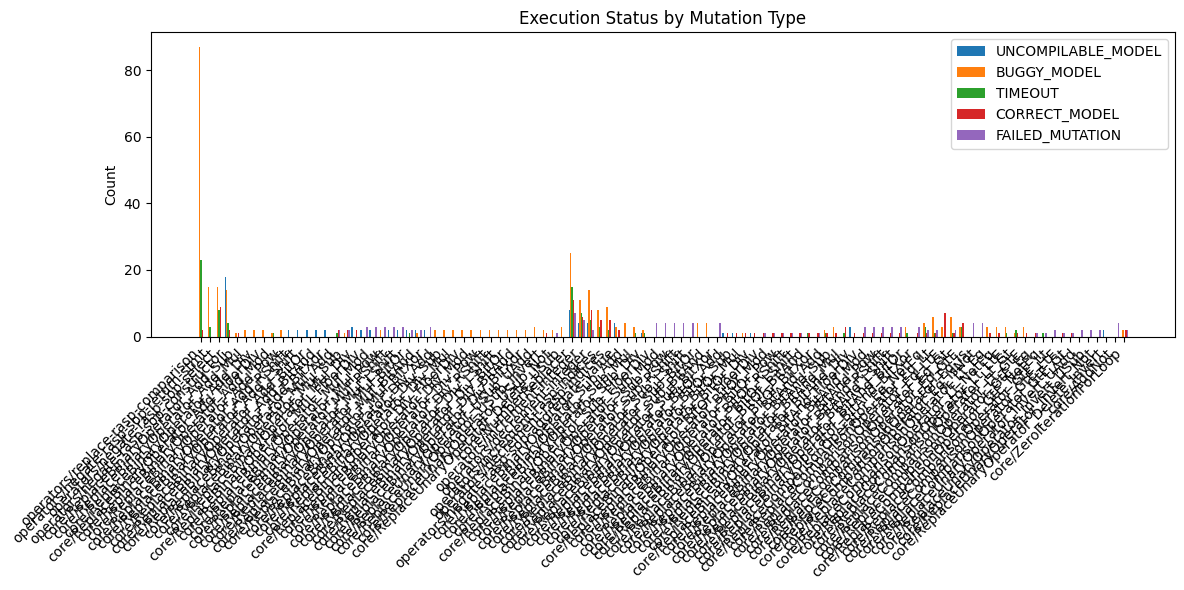

In [6]:
# Count status from execution_result by operator
results = {}
operators = []

for op in df['operator_name'].unique():
    op_group = df[df['operator_name'] == op]
    status_counts = op_group['execution_result'].apply(lambda x: x['status']).value_counts()
    results[op] = status_counts
    operators.append(op)

# Get unique status types
status_types = set()
for counts in results.values():
    status_types.update(counts.index)
status_types = list(status_types)

# Prepare data for plotting
data = []
for status in status_types:
    status_counts = [results[op].get(status, 0) for op in operators]
    data.append(status_counts)

# Plot
x = np.arange(len(operators))
width = 0.8 / len(status_types)
fig, ax = plt.subplots(figsize=(12, 6))

for i, (status, counts) in enumerate(zip(status_types, data)):
    offset = width * i - width * len(status_types)/2 + width/2
    ax.bar(x + offset, counts, width, label=status)

ax.set_ylabel('Count')
ax.set_title('Execution Status by Mutation Type')
ax.set_xticks(x)
ax.set_xticklabels(operators, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [7]:
# Create summary table by operator
operator_summary = []
for operator in df['operator_name'].unique():
    op_data = df[df['operator_name'] == operator]
    total = len(op_data)

    # Count status types
    status_counts = op_data['execution_result'].apply(lambda x: x['status']).value_counts()
    
    # Calculate buggy model accuracy
    buggy_models = op_data[op_data['execution_result'].apply(lambda x: x['status'] == 'BUGGY_MODEL')]
    mean_accuracy = buggy_models['execution_result'].apply(lambda x: x['accuracy']).mean()
    
    # Calculate success rate (buggy + correct models)
    success_rate = ((status_counts.get('BUGGY_MODEL', 0) + 
                    status_counts.get('CORRECT_MODEL', 0)) / total * 100)

    operator_summary.append({
        'Operator': operator,
        'Total': total,
        'BUGGY_MODEL': f"{status_counts.get('BUGGY_MODEL', 0)/total*100:.1f}%",
        'CORRECT_MODEL': f"{status_counts.get('CORRECT_MODEL', 0)/total*100:.1f}%",
        'FAILED_MUTATION': f"{status_counts.get('FAILED_MUTATION', 0)/total*100:.1f}%",
        'UNCOMPILABLE': f"{status_counts.get('UNCOMPILABLE_MODEL', 0)/total*100:.1f}%",
        'TIMEOUT': f"{status_counts.get('TIMEOUT', 0)/total*100:.1f}%",
        'Mean_Accuracy': f"{mean_accuracy:.2f}" if not pd.isna(mean_accuracy) else "N/A"
    })

# Create DataFrame and display
operator_df = pd.DataFrame(operator_summary)
operator_df = operator_df.sort_values('Total', ascending=False)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
display(operator_df)

,Operator,Total,BUGGY_MODEL,CORRECT_MODEL,FAILED_MUTATION,UNCOMPILABLE,TIMEOUT,Mean_Accuracy
0,operators/replace-rasp-comparison,112,77.7%,1.8%,0.0%,0.0%,20.5%,0.30
41,core/NumberReplacer,66,37.9%,16.7%,10.6%,12.1%,22.7%,0.56
3,operators/negate-rasp-sop-constructor,38,36.8%,5.3%,0.0%,47.4%,10.5%,0.25
42,operators/increment-integer,33,33.3%,18.2%,15.2%,12.1%,21.2%,0.60
43,operators/decrement-integer,33,42.4%,24.2%,6.1%,12.1%,15.2%,0.55
2,operators/negate-rasp-sop-select,32,46.9%,28.1%,0.0%,0.0%,25.0%,0.28
1,operators/negate-rasp-sop-return-stmt,18,83.3%,0.0%,0.0%,0.0%,16.7%,0.24
44,operators/increment-rasp-indices,16,50.0%,31.2%,0.0%,0.0%,18.8%,0.31
45,operators/decrement-rasp-indices,16,56.2%,31.2%,0.0%,0.0%,12.5%,0.45
81,core/ReplaceComparisonOperator_Eq_Lt,10,60.0%,10.0%,20.0%,0.0%,10.0%,0.51


In [8]:
buggy_models = df[df["execution_result"].apply(lambda x: x["status"] == "BUGGY_MODEL")]

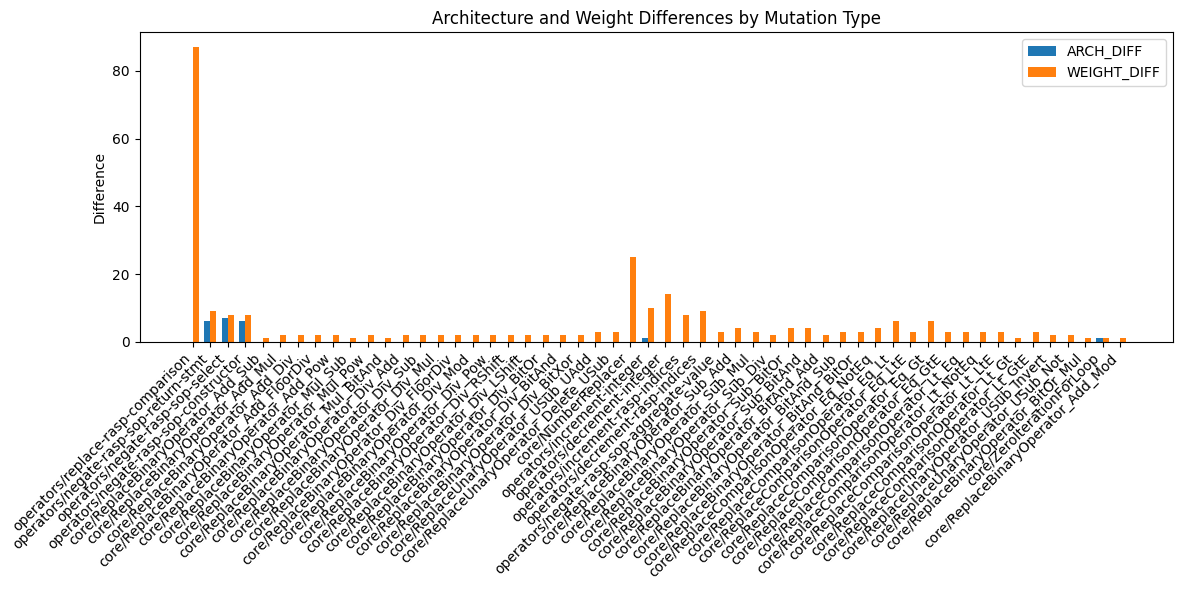

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Group data by operator_name and calculate count for each diff_type
arch_diffs = []
weight_diffs = []
operators = []

for op in buggy_models['operator_name'].unique():
    op_group = buggy_models[buggy_models['operator_name'] == op]
    
    arch_diff = np.sum([d['diff_type'] == 'ARCH_DIFF' for d in op_group['diff']])
    weight_diff = np.sum([d['diff_type'] == 'WEIGHT_DIFF' for d in op_group['diff']])
    
    arch_diffs.append(arch_diff)
    weight_diffs.append(weight_diff)
    operators.append(op)

# Set up the plot
x = np.arange(len(operators))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, arch_diffs, width, label='ARCH_DIFF')
ax.bar(x + width/2, weight_diffs, width, label='WEIGHT_DIFF')

# Customize the plot
ax.set_ylabel('Difference')
ax.set_title('Architecture and Weight Differences by Mutation Type')
ax.set_xticks(x)
ax.set_xticklabels(operators, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [10]:
# Create table data
table_data = {
    'Operator': operators,
    'Total': np.array(arch_diffs) + np.array(weight_diffs),
    'ARCH_DIFF': arch_diffs,
    'WEIGHT_DIFF': weight_diffs,
}

# Convert to DataFrame and display
df_table = pd.DataFrame(table_data)
df_table = df_table.sort_values('Total', ascending=False)
df_table['ARCH_DIFF %'] = (df_table['ARCH_DIFF'] / df_table['Total'] * 100).round(1)
df_table['WEIGHT_DIFF %'] = (df_table['WEIGHT_DIFF'] / df_table['Total'] * 100).round(1)
display(df_table)

,Operator,Total,ARCH_DIFF,WEIGHT_DIFF,ARCH_DIFF %,WEIGHT_DIFF %
0,operators/replace-rasp-comparison,87,0,87,0.0,100.0
25,core/NumberReplacer,25,0,25,0.0,100.0
2,operators/negate-rasp-sop-select,15,7,8,46.7,53.3
1,operators/negate-rasp-sop-return-stmt,15,6,9,40.0,60.0
27,operators/decrement-integer,14,0,14,0.0,100.0
3,operators/negate-rasp-sop-constructor,14,6,8,42.9,57.1
26,operators/increment-integer,11,1,10,9.1,90.9
29,operators/decrement-rasp-indices,9,0,9,0.0,100.0
28,operators/increment-rasp-indices,8,0,8,0.0,100.0
40,core/ReplaceComparisonOperator_Eq_Lt,6,0,6,0.0,100.0


In [11]:
# Get all ARCH_DIFFs from buggy models
arch_diff_models = df[df.apply(lambda x: 
    x['execution_result']['status'] == 'BUGGY_MODEL' and 
    x['diff']['diff_type'] == 'ARCH_DIFF', axis=1)]

# Display summary of architectural differences
print(f"Total ARCH_DIFFs found: {len(arch_diff_models)}")
for idx, row in arch_diff_models.iterrows():
    print(f"\nProgram: {row['program_name']}")
    print(f"Operator: {row['operator_name']}")
    print()
    print(f"Source Code Diff: {row['result_object'].get('diff')}")
    print()
    print("Architectural Diff:")
    print(row['diff'].get('diff_str'))
    print()
    print("-" * 80)

Total ARCH_DIFFs found: 21

Program: hist
Operator: operators/negate-rasp-sop-return-stmt

Source Code Diff: --- mutation diff ---
--- asource/hist.py
+++ bsource/hist.py
@@ -14,5 +14,5 @@
     same_tok = rasp.Select(rasp.tokens, rasp.tokens, rasp.Comparison.EQ).named(
         "same_tok"
     )
-    return rasp.SelectorWidth(same_tok).named("hist")
+    return rasp.SelectorWidth(same_tok).named("hist") * -1
 

Architectural Diff:
 pos_embed
 token_embed
 transformer/layer_0/attn/key
 transformer/layer_0/attn/linear
 transformer/layer_0/attn/query
 transformer/layer_0/attn/value
 transformer/layer_0/mlp/linear_1
 transformer/layer_0/mlp/linear_2
+transformer/layer_1/attn/key
+transformer/layer_1/attn/linear
+transformer/layer_1/attn/query
+transformer/layer_1/attn/value
+transformer/layer_1/mlp/linear_1
+transformer/layer_1/mlp/linear_2

--------------------------------------------------------------------------------

Program: hist
Operator: operators/negate-rasp-sop-select

Source Cod